## Yelp API

In [3]:
from yelp_helpers import *
from yelp import *

In [117]:
url_params = {'categories': 'japanese'
    
}

In [118]:
test = city_search('Chandler')

Querying https://api.yelp.com/v3/businesses/search ...


In [119]:
test

{'error': {'code': 'UNAUTHORIZED_ACCESS_TOKEN',
  'description': 'The access token provided is not currently able to query this endpoint.'}}

In [4]:
key = load_api_key()
API_KEY = key['client_secret']

In [5]:
def request(host, path, api_key, url_params=None):
    """Given an api_key, send a GET request to the API.

    Parameters
    ----------
    host : str
        The domain host of the API.
    path : str
        The path of the API after the domain.
    api_key: str
        client_secret.
    url_params : dict
        An optional set of query parameters in the request.

    Returns
    -------
    dict
        The JSON response from the request.

    Raises
    ------
    HTTPError
        An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()

In [6]:
import requests

In [7]:
host = 'https://api.yelp.com'
path = '/v3/businesses/search'
api_key = key['client_secret']
url_params = {'categories': "chinese",
              'location': 'Chandler',
              'limit': 50
             }

In [8]:
tt = request(host, path, api_key, url_params)

Querying https://api.yelp.com/v3/businesses/search ...


In [9]:
tt

{'businesses': [{'id': 'bWucOPNoIjd8ECdiDyVq9Q',
   'alias': 'singing-pandas-asian-restaurant-and-bar-chandler',
   'name': 'Singing Pandas Asian Restaurant & Bar',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/gPuj6-DKU1MdglAPznGgGw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/singing-pandas-asian-restaurant-and-bar-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 399,
   'categories': [{'alias': 'bars', 'title': 'Bars'},
    {'alias': 'chinese', 'title': 'Chinese'},
    {'alias': 'asianfusion', 'title': 'Asian Fusion'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.3058, 'longitude': -111.82871},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '757 E Chandler Blvd',
    'address2': None,
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85225',
    'country': 'US',
    'state': 'AZ',
    'display_addre

In [12]:
search_offset = 0
search_limit = 50
total = tt['total']

In [25]:
for i in range(int(total/search_limit)):
    search_offset += search_limit
    url_params = {'categories': "chinese",
              'location': 'Chandler',
              'offset': search_offset,
              'limit': search_limit
             }
    tt['businesses'] += request(host, path, api_key, url_params)['businesses']

Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...


In [33]:
tt

{'businesses': [{'id': 'bWucOPNoIjd8ECdiDyVq9Q',
   'alias': 'singing-pandas-asian-restaurant-and-bar-chandler',
   'name': 'Singing Pandas Asian Restaurant & Bar',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/gPuj6-DKU1MdglAPznGgGw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/singing-pandas-asian-restaurant-and-bar-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 399,
   'categories': [{'alias': 'bars', 'title': 'Bars'},
    {'alias': 'chinese', 'title': 'Chinese'},
    {'alias': 'asianfusion', 'title': 'Asian Fusion'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.3058, 'longitude': -111.82871},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '757 E Chandler Blvd',
    'address2': None,
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85225',
    'country': 'US',
    'state': 'AZ',
    'display_addre

In [46]:
search_offset = 0
search_limit = 50
url_params = {'categories': "restaurants",
              'location': 'Phoenix',
              'limit': search_limit,
              'offset': search_offset
             }

In [47]:
tt1 = request(host, path, api_key, url_params)

Querying https://api.yelp.com/v3/businesses/search ...


In [48]:
total = min(tt1['total'], 950)

In [49]:
for i in range(int(total/search_limit)):
    search_offset += search_limit
    url_params = {'categories': "restaurants",
              'location': 'Phoenix',
              'offset': search_offset,
              'limit': search_limit
             }
    tt1['businesses'] += request(host, path, api_key, url_params)['businesses']

Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying h

In [50]:
len(tt1['businesses'])

1000

In [51]:
import pandas as pd

In [ ]:
columns=['categories', 'display_phone', 'id', 'image_url', 'name', 'location', 'rating', 'review_count']

In [59]:
df = pd.DataFrame(tt1['businesses'])

In [60]:
df

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,little-miss-bbq-phoenix-2,"[{'alias': 'bbq', 'title': 'Barbeque'}]","{'latitude': 33.4218771340634, 'longitude': -1...",(602) 437-1177,7928.626705,Xg5qEQiB-7L6kGJ5F4K3bQ,https://s3-media1.fl.yelpcdn.com/bphoto/Z0boK4...,False,"{'address1': '4301 E University Dr', 'address2...",Little Miss BBQ,+16024371177,$$,5.0,1807,[],https://www.yelp.com/biz/little-miss-bbq-phoen...
1,cibo-phoenix,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 33.45496, 'longitude': -112.079908}",(602) 441-2697,1427.893225,9a3DrZvpYxVs3k_qwlCNSw,https://s3-media4.fl.yelpcdn.com/bphoto/6FHzrs...,False,"{'address1': '603 N 5th Ave', 'address2': None...",Cibo,+16024412697,$$,4.5,1892,[pickup],https://www.yelp.com/biz/cibo-phoenix?adjust_c...
2,lux-central-phoenix-2,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...","{'latitude': 33.5005972575259, 'longitude': -1...",(602) 327-1396,6191.147233,OgJ0KxwJcJ9R5bUK0ixCbg,https://s3-media4.fl.yelpcdn.com/bphoto/zbqPnk...,False,"{'address1': '4400 N Central Ave', 'address2':...",Lux Central,+16023271396,$$,4.5,1948,[],https://www.yelp.com/biz/lux-central-phoenix-2...
3,harumi-sushi-phoenix,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 33.4497491809777, 'longitude': -1...",(602) 258-0131,711.602175,S-oLPRdhlyL5HAknBKTUcQ,https://s3-media1.fl.yelpcdn.com/bphoto/0elcfr...,False,"{'address1': '114 W Adams St', 'address2': 'St...",Harumi Sushi,+16022580131,$$,4.5,1058,[],https://www.yelp.com/biz/harumi-sushi-phoenix?...
4,la-santisima-phoenix,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 33.4692, 'longitude': -112.04739}",(602) 254-6330,3419.587107,frCxZS7lPhEnQRJ3UY6m7A,https://s3-media1.fl.yelpcdn.com/bphoto/S_dlB8...,False,"{'address1': '1919 N 16th St', 'address2': '',...",La Santisima,+16022546330,$$,4.0,1908,[pickup],https://www.yelp.com/biz/la-santisima-phoenix?...
5,welcome-diner-phoenix,"[{'alias': 'diners', 'title': 'Diners'}]","{'latitude': 33.45553, 'longitude': -112.06071}",(602) 495-1111,1460.724694,cTZmf7B-4yciMc1WKiCVOA,https://s3-media2.fl.yelpcdn.com/bphoto/bwpAzO...,False,"{'address1': '929 E Pierce St', 'address2': ''...",Welcome Diner,+16024951111,$$,4.5,865,[],https://www.yelp.com/biz/welcome-diner-phoenix...
6,postino-arcadia-phoenix,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 33.5021667480469, 'longitude': -1...",(602) 852-3939,9346.153686,u-SJ5QUwrNquL9VnXwl8cg,https://s3-media2.fl.yelpcdn.com/bphoto/h2Nf26...,False,"{'address1': '3939 E Campbell Ave', 'address2'...",Postino Arcadia,+16028523939,$$,4.5,1239,[],https://www.yelp.com/biz/postino-arcadia-phoen...
7,pizzeria-bianco-phoenix,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 33.4492351, 'longitude': -112.065...",(602) 258-8300,622.847464,pSQFynH1VxkfSmehRXlZWw,https://s3-media1.fl.yelpcdn.com/bphoto/N1m6xP...,False,"{'address1': '623 E Adams St', 'address2': '',...",Pizzeria Bianco,+16022588300,$$,4.0,2218,[],https://www.yelp.com/biz/pizzeria-bianco-phoen...
8,matts-big-breakfast-phoenix-2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 33.4574481512938, 'longitude': -1...",(602) 254-1074,1395.761877,L2p0vO3fsS2LC6hhQo3CzA,https://s3-media4.fl.yelpcdn.com/bphoto/_lEdrS...,False,"{'address1': '825 N 1st St', 'address2': '', '...",Matt's Big Breakfast,+16022541074,$$,4.0,1741,[],https://www.yelp.com/biz/matts-big-breakfast-p...
9,postino-central-phoenix,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 33.51268, 'longitude': -112.07414}",(602) 274-5144,7529.886872,FogTa-wmjhVnJCoTiaxvZA,https://s3-media2.fl.yelpcdn.com/bphoto/KAF973...,False,"{'address1': '5144 N Central Ave', 'address2':...",Postino Central,+16022745144,$$,4.5,1017,[],https://www.yelp.com/biz/postino-central-phoen...


In [16]:
url_params = {'categories': "italian,french",
              'location': 'Chandler',
              'limit': 3
             }

In [17]:
tt2 = request(host, path, api_key, url_params)
tt2

Querying https://api.yelp.com/v3/businesses/search ...


{'businesses': [{'id': 'i5vxtyiHKYnRcJ0p9N7mLw',
   'alias': 'carlo-and-emilies-gourmet-deli-chandler',
   'name': "Carlo & Emilie's Gourmet Deli",
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/x4ck70H63UQwzTeE6UeENw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/carlo-and-emilies-gourmet-deli-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 298,
   'categories': [{'alias': 'delis', 'title': 'Delis'},
    {'alias': 'italian', 'title': 'Italian'},
    {'alias': 'french', 'title': 'French'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.274753988508,
    'longitude': -111.859773136675},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '2040 S Alma School Rd',
    'address2': 'Ste 12',
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85286',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['204

In [21]:
tt3 = {}

In [22]:
tt3['businesses'] = tt1['businesses'] + tt2['businesses']

In [23]:
tt3

{'businesses': [{'id': '2T66oHiIi1Ql-j5IhwbGjw',
   'alias': 'wimpys-paradise-chandler',
   'name': "Wimpy's Paradise",
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/SPBMJ9MSL6WEYg3a-EZDvQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/wimpys-paradise-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 191,
   'categories': [{'alias': 'burgers', 'title': 'Burgers'},
    {'alias': 'icecream', 'title': 'Ice Cream & Frozen Yogurt'},
    {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.30291, 'longitude': -111.84253},
   'transactions': ['pickup', 'delivery'],
   'price': '$',
   'location': {'address1': '48 S San Marcos Pl',
    'address2': None,
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85225',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['48 S Sa

In [83]:
(tt['businesses'][0]).keys()

dict_keys(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count', 'categories', 'rating', 'coordinates', 'transactions', 'price', 'location', 'phone', 'display_phone', 'distance'])

In [84]:
b0 = tt['businesses'][0]

In [85]:
b0['name'], b0['location']['display_address'], b0['display_phone']

('Singing Pandas Asian Restaurant & Bar',
 ['757 E Chandler Blvd', 'Chandler, AZ 85225'],
 '(480) 777-5050')

In [87]:
print(b0['name'])

Singing Pandas Asian Restaurant & Bar


In [90]:
for v in b0['location']['display_address']:
    print(v)

757 E Chandler Blvd
Chandler, AZ 85225


In [91]:
for v in tt['businesses'][2]['location']['display_address']:
    print(v)

2015 N Dobson Rd
Ste 2
Chandler, AZ 85224


In [98]:
from IPython.display import Image

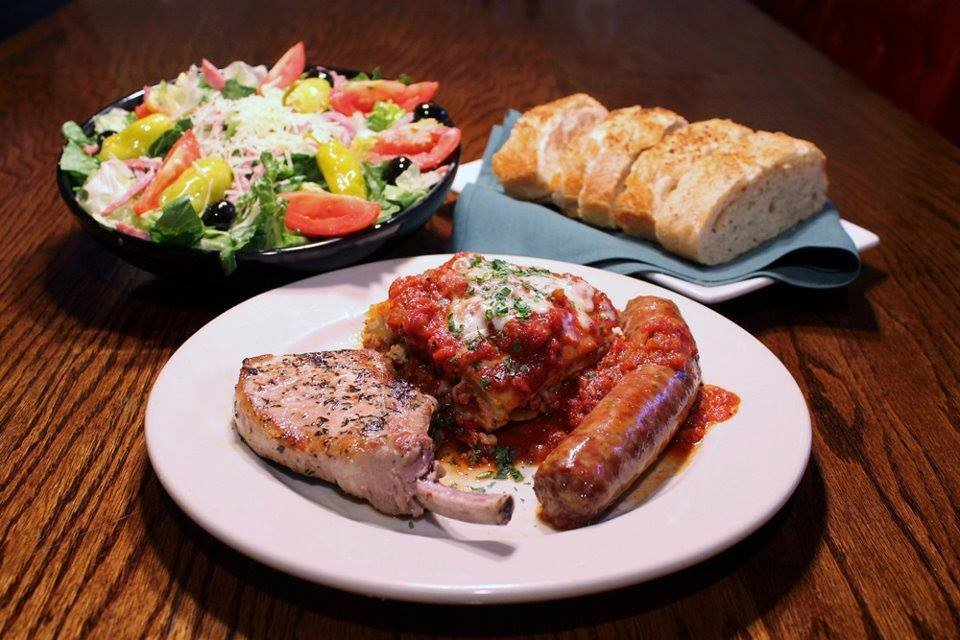

In [156]:
Image(tt2['businesses'][9]['image_url'])

In [50]:
tt2 = request(host, path, api_key, url_params)

Querying https://api.yelp.com/v3/businesses/search ...


In [51]:
tt2

{'businesses': [{'id': 'ujgpePdD8Q-fP1mPFnw0Qw',
   'alias': 'peixoto-coffee-chandler-2',
   'name': 'Peixoto Coffee',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/EQg2GErx3TztENWkYLhnWw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/peixoto-coffee-chandler-2?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 492,
   'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'},
    {'alias': 'coffeeroasteries', 'title': 'Coffee Roasteries'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.301900334904,
    'longitude': -111.841690018773},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '11 W Boston Suite',
    'address2': '',
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85225',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['11 W Boston Suite', 'Chandler, AZ 85225']},
   'phone': '+14802752843',
 